In [2]:
import pandas as pd

data_df = pd.read_csv('data.csv',parse_dates=["time"])
print(data_df.shape)
# data_df.info()  # 查看数据信息，有无缺失值
data_df.head()

(393886, 28)


,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,2015-11-01 20:20:16,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,...,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,2015-11-01 20:20:23,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,...,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,2015-11-01 20:20:30,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,...,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,2015-11-01 20:20:37,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,...,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,2015-11-01 20:20:47,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,...,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1


数据共三十九万多行，28个特征值
data.csv文件是带有所有特征字段的数据集；
failure.csv文件是风力发电机叶片故障时间段，时间段包括2个字段：开始时间startTime、结束时间endTime；
normal.csv文件是风力发电机叶片正常时间段，时间段包括2个字段：开始时间startTime、结束时间endTime。

In [3]:
# 数据处理，获取正常时间段
normalTime_df = pd.read_csv('normal.csv', parse_dates=["startTime", "endTime"])
print(normalTime_df.shape)
# normalTime_df.info()
normalTime_df.head()

(26, 2)


,startTime,endTime
0,2015-11-01 20:20:16,2015-11-03 23:47:32
1,2015-11-04 14:04:51,2015-11-04 18:26:08
2,2015-11-05 11:06:59,2015-11-09 02:44:31
3,2015-11-09 12:30:09,2015-11-09 19:23:32
4,2015-11-10 00:04:50,2015-11-15 23:03:06


In [4]:
# 数据处理，获取故障时间段
failureTime_df = pd.read_csv('failure.csv', parse_dates=["startTime", "endTime"])
print(normalTime_df.shape)
# normalTime_df.info()
normalTime_df.head()

(26, 2)


,startTime,endTime
0,2015-11-01 20:20:16,2015-11-03 23:47:32
1,2015-11-04 14:04:51,2015-11-04 18:26:08
2,2015-11-05 11:06:59,2015-11-09 02:44:31
3,2015-11-09 12:30:09,2015-11-09 19:23:32
4,2015-11-10 00:04:50,2015-11-15 23:03:06


In [5]:
# 取出预测目标值为正常的样本-根据时间段
normal_list = []
for index in normalTime_df.index:
    startTime = normalTime_df.loc[index].startTime
    endTime = normalTime_df.loc[index].endTime
    # 从样本中取出在这一段正常时间内所有的样本数据    
    part_df = data_df[data_df.time.between(startTime, endTime)]
    print(part_df.shape)
    normal_list.append(part_df)
    
# 将正常样本合并为一个新的DataFrame
normal_df = pd.concat(normal_list).reset_index(drop=True)
normal_df.shape

(4756, 28)
(971, 28)
(43020, 28)
(3383, 28)
(39486, 28)
(35032, 28)
(14016, 28)
(2120, 28)
(29550, 28)
(1321, 28)
(3212, 28)
(13254, 28)
(6513, 28)
(681, 28)
(12049, 28)
(2967, 28)
(19126, 28)
(561, 28)
(132, 28)
(2588, 28)
(15450, 28)
(18678, 28)
(5026, 28)
(20051, 28)
(8584, 28)
(47728, 28)


(350255, 28)

In [7]:
# 取出预测目标值为故障的样本-根据时间段
failure_list = []
for index in failureTime_df.index:
    startTime = failureTime_df.loc[index].startTime
    endTime = failureTime_df.loc[index].endTime
    # 从样本中取出在这一段故障时间内所有的样本数据    
    part_df = data_df[data_df.time.between(startTime, endTime)]
    print(part_df.shape)
    failure_list.append(part_df)
    
# 将故障样本合并为一个新的DataFrame
failure_df = pd.concat(failure_list).reset_index(drop=True)
failure_df.shape

(443, 28)
(265, 28)
(951, 28)
(1150, 28)
(951, 28)
(106, 28)
(352, 28)
(951, 28)
(951, 28)
(1286, 28)
(951, 28)
(1254, 28)
(148, 28)
(951, 28)
(616, 28)
(951, 28)
(951, 28)
(797, 28)
(951, 28)
(951, 28)
(1244, 28)
(909, 28)
(546, 28)
(951, 28)
(592, 28)
(870, 28)
(951, 28)
(951, 28)
(951, 28)


(23892, 28)

In [8]:
# 统计正常，故障，无效样本占比
stat_df = pd.DataFrame(
    { 'number' : [normal_df.shape[0], failure_df.shape[0], data_df.shape[0]-normal_df.shape[0]-failure_df.shape[0]]}, 
      index = ['normal', 'failure', 'invalid'])
stat_df['ratio'] = stat_df['number'] / stat_df['number'].sum()
stat_df

,number,ratio
normal,350255,0.889229
failure,23892,0.060657
invalid,19739,0.050113


In [9]:
# 下采样：
# 因为预测目标值为正常的样本远远多于预测目标值为故障的样本，所以对预测目标值为正常的样本做下采样。
# 下采样指减少样本或者减少特征，具体方法是选取一部分正常样本，数量为故障样本的2倍。
import random
normalpart_df = normal_df.loc[random.sample(list(normal_df.index), k = failure_df.shape[0]*2)]
normalpart_df.shape

(47784, 28)

In [10]:
# 形成特征矩阵和预测目标值-把抽取出来的部分正常样本和故障样本和为一个样本
import numpy as np
feature_df = pd.concat([normalpart_df, failure_df]).reset_index(drop=True)
x= feature_df.drop('time', axis=1).values   # 丢掉时间列（无用）
print(x.shape)
y = np.append(np.ones(len(normalpart_df)), np.zeros(len(failure_df)))
print(y.shape)

(71676, 27)
(71676,)


In [12]:
# 保存数据
import pickle
with open('x.pickle', 'wb') as file:
    pickle.dump(x, file)
    
with open('y.pickle', 'wb') as file:
    pickle.dump(y, file)

In [13]:
# 4 模型训练
# 4.1、加载处理好的数据
with open('x.pickle', 'rb') as file:
    x = pickle.load(file)

with open('y.pickle', 'rb') as file:
    y = pickle.load(file)

In [14]:
# 4.2、随机森林模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

rfc_model = RandomForestClassifier(n_jobs=-1)  # 参数n_jobs设置为-1时，会最大化利用电脑的多线程性能
cv_split = ShuffleSplit(n_splits=5)    # 参数n_splits设置为5，表示会做5折交叉验证
score_nadrry = cross_val_score(rfc_model, x, y, cv=cv_split)   # 返回结果的数据类型为ndarray对象
print(score_nadrry.round(4))   # ndarray对象的round方法可以使其中的数保留指定位数
print(score_nadrry.mean().round(4))

[1.     1.     1.     0.9999 1.    ]
1.0


In [15]:
# 4.3、xgboost模型
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')  # 忽略警告信息
cv_split = ShuffleSplit(n_splits=5)
xgb_model = XGBClassifier(nthread=4)  # nthread设置为4时，利用4线程做模型训练
score_nadrry = cross_val_score(xgb_model, x, y, cv=cv_split)   
print(score_nadrry.round(4))
print(score_nadrry.mean().round(4))

[0.9794 0.9809 0.9827 0.9856 0.9809]
0.9819


In [16]:
# 5 模型评估
# 5.1、模型得分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xgb_model = XGBClassifier(nthread=8)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test).round(4)

0.9812

In [26]:
# 5.2、混淆矩阵
from sklearn.metrics import confusion_matrix
y_predict = xgb_model.predict(x_test)
lables = ['故障', '正常']
pd.DataFrame(confusion_matrix(y_test, y_predict),columns=lables, index=lables)

,故障,正常
故障,4601,106
正常,164,9465


In [27]:
# 5.3、 precision、recall、f1-score、support报告表
from sklearn.metrics import precision_recall_fscore_support

def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

eval_model(y_test, y_predict, lables)

,Label,Precision,Recall,F1,Support
0,故障,0.965582,0.977480,0.971495,4707
1,正常,0.988925,0.982968,0.985938,9629
999,总体,0.981261,0.981166,0.981196,14336


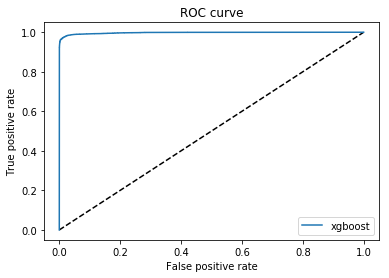

In [56]:
# 5.4、绘制ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_predict_probability = xgb_model.predict_proba(x)
false_predict,true_predict, threshold = roc_curve(y, y_predict_probability[:,1])
plt.plot([0,1], [0,1],'k--')
plt.plot(false_predict, true_predict,label='xgboost')
plt.legend()
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [55]:
# 5.5、保存模型
with open("xgb_model.pickle", "wb") as file:
    pickle.dump(xgb_model, file)

In [17]:
# 6、模型测试
# 6.1、模型加载
with open("xgb_model.pickle", "rb") as file:
    xgb_model = pickle.load(file)

In [19]:
# 6.2、测试数据准备
test_df = pd.read_csv("data_test.csv", index_col=0)
print(test_df.shape)
test_df.head(3)

(190494, 29)


,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group,clf
0,2015-11-01 17:33:56,2.671346,1.316661,2.571868,-0.786604,-0.985671,0.235157,-0.143615,4.653333,4.640000,...,0.33777,0.686099,0.769231,1.000000,0.923077,0.08,-0.80,0.60,1,1
1,2015-11-01 17:34:03,3.058582,1.293394,2.537818,-0.924712,-0.712099,0.235157,-0.108731,6.395556,6.417778,...,0.33777,0.686099,0.769231,1.000000,0.923077,0.68,1.04,0.76,1,1
2,2015-11-01 17:34:10,3.279860,1.187033,2.551855,-0.962692,-1.054064,0.235157,-0.108731,5.417778,5.435556,...,0.33777,0.686099,0.769231,1.013846,0.923077,1.00,1.44,0.88,1,1


In [21]:
# 预测目标值是clf字段，查看clf字段的统计计数情况
# 数字0代表故障的样本，1代表正常，2代表无效样本
test_df["clf"].value_counts()

1    168929
2     10927
0     10638
Name: clf, dtype: int64

In [23]:
y = test_df["clf"].values
x = test_df.drop(["time", "clf"], axis=1).values
# 去除无效样本
exam_x= x[y<2]
exam_y = y[y<2]
print(exam_x.shape)
print(exam_y.shape)

(179567, 27)
(179567,)


In [28]:
# 6.3 绘制precision、recall、f1-score、support报告表
def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

predict_exam_y = xgb_model.predict(exam_x)
labels = ['故障', '正常']
eval_model(exam_y, predict_exam_y, labels)

,Label,Precision,Recall,F1,Support
0,故障,0.405864,0.247227,0.307279,10638
1,正常,0.953734,0.977209,0.965329,168929
999,总体,0.921277,0.933963,0.926345,179567


总结：
1.模型在原数据集经过交叉验证取得了优秀的评估指标；
2.模型在正常样本的预测中取得很高的查准率和查全率；
3.模型在故障样本的预测中取得很低的查准率和查全率；
4.模型在新数据集的测试效果差，说明模型泛化能力差，想要提高模型的泛化能力，则需要提取出更多数据中的有效特征。